<body>
    <div>
        <h2 style='font-family: cursive; font-size: 40px;'>Punto Fijo</h2>
        <img src=https://www.mty.itesm.mx/etie/deptos/m/ma95-843/dudas/puntof-d.gif alt=middle style="height: 340px">
    </div>
</body>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Formulación matemática</h3>

<div style='text-align:center; font-size:16px'>
$F(x) = x - \phi{(x)}$ con $\phi{(x)} = \frac {1} {max (|f'(x)|)}$ en $[a,b]$.
</div>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Valores iniciales</h3>

<div style='text-align: center; font-size: 16px;'>
    $a$:   Parte izquierda del intervalo. <br>
    $b$:   Parte derecha del intervalo. <br>
    $x_0$: Punto dentro del intervalo. 
</div>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Ventajas y desventajas</h3>

<table style="width:100%; text-align: left; font-size: 14px">
    <tr style="text-align: left;">
        <th style="text-align: left;">Ventajas</th>
        <th style="text-align: left;">Desventajas</th>
    </tr>
    <tr>
        <td style="text-align: left;">Simple.</td>
        <td style="text-align: left;">La convergencia depende de la magnitud de $g’(x)$.</td>
    </tr>
    <tr>
        <td style="text-align: left;">Posee condiciones para asegurar la convergencia.
Es condición necesaria que $|g'(x)| < 1$ en cercanías de la raíz.</td>
        <td style="text-align: left;">Necesidad de construir funciones $g(x)$ para iterar. Pueden
existir diversas $g(x)$, necesidad de encontrar la adecuada. Se puede emplear un método sistemático para construir las funciones.</td>
    </tr>

   
</table>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Pseudocódigo</h3>

<ol>
    <li>Calcular la derivada de la función</li>
    <div>
        <li>Parte 1. Verificar existencia:</li>
        <ol>
            <li>Calcula los puntos criticos de la derivada</li>
            <li>Para cada punto critico</li>
            <li>Calcular el valor de la funcion en el punto critico</li>
            <li>Si el valor no esta dentro del intervalo</li>
            <li>Retornar que la función no cumple el criterio de la existencia</li>
            <li>Fin Si</li>
            <li>Fin Para</li>
            <li>Calcular la funcion en los puntos a y b</li>
            <li>Si los valores estan dentro del intervalo [a, b]</li>
            <li>Retornar que sí cumple el criterio de la existencia</li>
        </ol>
    </div>
    <div>
        <li>Parte 2. Verificar unicidad:</li>
        <ol>
            <li>Calcula los puntos criticos de la derivada</li>
            <li>Para cada punto critico</li>
            <li>Calcular el valor de la funcion en el punto critico</li>
            <li>Si el valor no esta dentro del intervalo</li>
            <li>Retornar que la función no cumple el criterio de la unicidad</li>
            <li>Fin Si</li>
            <li>Fin Para</li>
            <li>Retornar que sí cumple el criterio de la unicidad</li>
        </ol>
    </div>
    <div>
        <li>Parte 3. Calcular el valor de X:</li> 
        <ol>
            <li>$x_k = x_0$</li>
            <li>Para i iteraciones</li>
            <li>$x_{k+1} = f(x_k)$</li>
            <li>$error = |x_{k+1} - x_k|$</li>
            <li>Fin Para</li>
        </ol>
    </div>
</ol>

<h3 style="font-family: 'Courier New'; font-size:25px">Octave</h3>

In [9]:
format long
pkg load symbolic

function y=derivate(f)
    syms x
    ff=f(x);
    ffd=diff(ff,x);
    y=function_handle(ffd);
end

function y=belongToInverval(a,b,x)
    y=x>=a && x<=b;
end

function y=solve_eq(footion)
    %Esta funcion encuentra los ceros de la funcion.
    %
    %Sintaxis: solve_eq(footion)
    %
    %Parámetros Iniciales:
    %            footion = Funcion que se esta resolviendo.
    %
    %Parámetros de Salida: 
    %            y = Lista de soluciones encontradas.
    %
    syms x
    y=solve(sym(footion));
    if strcmpi(class(y), 'cell')
        y='no';
    end
end

function y=hasExistence(footion,deetion,a,b)
    %Esta función verifica si la footion cumple el criterio de la exisencia.
    %
    %Sintaxis:  hasExistence(footion,deetion,a,b)
    % 
    %Parámetros Iniciales: 
    %            footion = Funcion que se esta resolviendo.
    %            deetion = Funcion footion derivada.
    %            a = Punto izquierda del intervalo donde se comienza la iteración.
    %            b = Punto derecha del intervalo donde se comienza la iteración.
    %            
    %Parámetros de Salida:                           
    %            y = Indicador que dice si cumple o no.
    %
    critical_point=solve_eq(deetion);
    if strcmpi(class(critical_point), 'char')
        display('No tiene puntos criticos.');
        y=1;
    else
        n=length(critical_point);
        if n==1
            value=footion(critical_point);
            if belongToInverval(a,b,real(value)) ~= 1
                y=1;
            else
                y=0;
            end
        else
            for i=1:n
                value=footion(critical_point(i));
                if belongToInverval(a,b,real(value)) ~= 1
                    y=1;
                end
            end
        end
        ext_a=footion(a);
        ext_b=footion(b);
        if belongToInverval(a,b,ext_a) ~= 1 || belongToInverval(a,b,ext_b) ~= 1
            y=1;
        else
            y=0;
        end
    end
end

function y=hasUniq(footion,deetion,a,b)
    %Esta función verifica si la footion cumple el criterio de la unicidad.
    %
    %Sintaxis:  hasUniq(footion,deetion,a,b)
    % 
    %Parámetros Iniciales: 
    %            footion = Funcion que se esta resolviendo.
    %            deetion = Funcion footion derivada.
    %            a = Punto izquierda del intervalo donde se comienza la iteración.
    %            b = Punto derecha del intervalo donde se comienza la iteración.
    %            
    %Parámetros de Salida:                           
    %            y = Indicador que dice si cumple o no.
    %
    critical_point=solve_eq(deetion);
    if strcmpi(class(critical_point), 'char')
        display('No tiene puntos criticos.');
        y=1;
    else
        n=length(critical_point);
        if n==1
            if ~belongToInverval(-1,1,real(critical_point))
                y=1;
            else
                y=0;
            end
        else
            for i=1:n
                
                value=critical_point(i);
                if ~belongToInverval(-1,1,real(value))
                    y=1;
                end
            end
        y=0;
        end
    end
end

function [xk,e]=fixed_point(f,x0,a,b,tol,iter)
    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método del punto fijo.
    %
    %Sintaxis:  fixed_point(f,x0,a,b,tol,iter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f.
    %            x0 = Punto de la funcion.
    %            a = Punto izquierda del intervalo donde se comienza la iteración.
    %            b = Punto derecha del intervalo donde se comienza la iteración.
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    %            iter = cantidad de iteraciones máximas.
    %            
    %Parámetros de Salida:                           
    %            xk = aproximación del cero de la función f
    %            e =  |f(x)|
    %
    footion=str2func(strcat('@(x)',f));
    deetion=derivate(footion);
    e=[];
    
    existence=hasExistence(footion,deetion,a,b);
    if existence ~= 0
        xk=0;
        e=[0];
        display("No cumple el criterio de la existencia"); 
        return;
    end
    
    uniq=hasUniq(footion,deetion,a,b);
    if uniq ~= 0
        xk=0;
        e=[0]
        display("No cumple el criterio de la unicidad");
    else 
        xk=x0;
        for i=1:iter
            xk= footion(xk);
            error=abs(xk-x0);
            if error < tol
                break;
            else
                e=[e error];
                x0=xk;
            end
        end
    end
    plot(0:length(e)-1,e);
end



<h3 style="font-family: 'Courier New'; font-size:25px">Python</h3>

In [10]:
def len_list(it):
    list = []
    for i in range(it):
        list.append(i)
    return list


def plot(e):
    import matplotlib.pyplot
    matplotlib.pyplot.plot(len_list(len(e)), e)
    
    
def belongToInverval(a, b, x):
    return x >= a and x <= b
    
    
def solve_eq(footion):
    """
    Obtiene los ceros de la funcion.
    Parametros iniciales:
    footion = Funcion que sera resuelta.
    
    Parámetros de Salida:
    y = Lista de soluciones de la funcion.
    """
    import sympy as sym
    x = sym.symbols('x')
    return sym.solve(footion, x)
    
    
def get_funcs(f):
    """
    Esta funcion recive un string que represente una funcion ,y devuelve una funcion utilizable en python y su derivada.
    Parametros iniciales:
    f = una  cadena de caracteres (string) que representa a la función f.
    
    Parámetros de Salida: 
    [footion, deetion], donde  
    footion = Funcion que sera resuelta.
    deetion = Derivada de la funcion que sera resuelta.
    """
    from sympy import symbols, sympify, diff
    footion = sympify(f)
    x = symbols('x')
    deetion = diff(footion, x)
    return footion, deetion


def hasExistence(footion, deetion, a, b):
    """
    Esta función verifica si la footion cumple el criterio de la existencia.
    Parametros iniciales:
    footion = Funcion que se esta resolviendo.
    deetion = Funcion footion derivada.
    a = Punto izquierda del intervalo donde se comienza la iteración.
    b = Punto derecha del intervalo donde se comienza la iteración.
    
    Parámetros de Salida: 
    [y], donde                
    y = Indicador que dice si cumple o no.
    """
    critical_point = solve_eq(deetion);
    if critical_point == []:
        return 0
    else:
        for point in critical_point:
            value = float(footion.subs({'x':point}))
            if not belongToInverval(a, b, value):
                return 0
            
        ext_a = float(footion.subs({'x':a}))
        ext_b = float(footion.subs({'x':b}))
        if belongToInverval(a, b, ext_a) and belongToInverval(a, b, ext_a):
            return 1
        else:
            return 0
        
        
def hasUniq(footion, deetion, a, b):
    """
    Esta función verifica si la footion cumple el criterio de la unicidad.
    Parametros iniciales:
    footion = Funcion que se esta resolviendo.
    deetion = Funcion footion derivada.
    a = Punto izquierda del intervalo donde se comienza la iteración.
    b = Punto derecha del intervalo donde se comienza la iteración.
    
    Parámetros de Salida: 
    [y], donde                
    y = Indicador que dice si cumple o no.
    """
    critical_point = solve_eq(deetion);
    if critical_point == []:
        return 0
    else:
        for point in critical_point:
            value = footion.subs({'x':point})
            if not belongToInverval(a, b, value):
                return 0
        return 1

def fixed_point(f, x0, a, b, tol, iter):
    """
    Esta función aproxima la solución de una ecuació f(x)=0, implementando el metodo del punto fijo.
    Parametros iniciales:
    f = una  cadena de caracteres (string) que representa a la función f.
    x0 = Punto de la función.
    a = Punto izquierda del intervalo donde se comienza la iteración.
    b = Punto derecha del intervalo donde se comienza la iteración.
    tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    iter = cantidad de iteraciones máximas.
    
    Parámetros de Salida: 
    [xk,e], donde                
    xk = aproximación del cero de la función f.
    e =  Lista de errores de cada iteracion.
    """
    footion, deetion = get_funcs(f)
    existence = hasExistence(footion, deetion, a, b)
    uniq = hasUniq(footion, deetion, a, b)
    xk = 0
    e = []
    if not existence or not uniq:
        pal = "" if existence else ("No cumple el criterio de la existencia. \n ")
        pal = "" if uniq else (pal + "No cumple el criterio de la unicidad.")
        print(pal)
        return 0, []
    else:
        xk = x0
        for i in range(iter):
            xk = float(footion.subs({'x':xk}))
            error = abs(xk - x0)
            if error < tol:
                break
            else:
                e.append(error)
                x0 = xk
    return xk, e
  

<h3 style="font-family: 'Courier New'; font-size:25px">Ejemplo Numérico</h3>

<h5 style="font-family: 'Courier New'; font-size:16px">Python</h5>

0.606464344938615


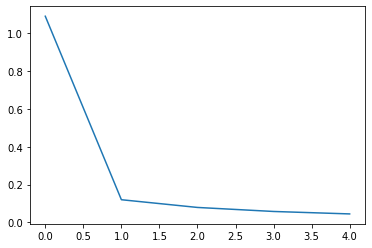

In [11]:
xk, e = fixed_point('sin(x)', 2, -1, 3, 10^-12, 5)
print(xk)
plot(e)

<h5 style="font-family: 'Courier New'; font-size:16px">Octave</h5>

xk =    6.064643449386150e-01
e =

 Columns 1 through 3:

   1.090702573174318e+00   1.202250832527934e-01   7.937230333836254e-02

 Columns 4 and 5:

   5.809377658469672e-02   4.514191871121409e-02



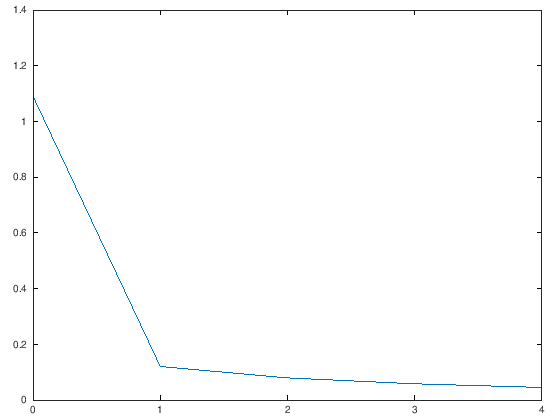

In [12]:
[xk,e]=fixed_point('sin(x)', 2, -1, 3, 10^-12, 5)
